In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [2]:
sales_train = pd.read_excel('Sales.xlsx', sheet_name='Train')

In [3]:
sales_test = pd.read_excel('Sales.xlsx', sheet_name='Test')

## test

In [6]:
sales_train['Total Books'] = sales_train.apply(lambda x: x['Units Sold'] + x['Available Books in the shelf'], axis=1)
sales_train.head()

,Units Sold,Available Books in the shelf,Price,State,Time,Week,NewYear,MLK,Presidents,GoodFriday,Memorial,Independence,Labor,Thanksgiving,Christmas,BookCode,Total Books
0,6187.0,10146.68,14.474543,Arizona,Week End 01-06-19,2019-01-06,1,0,0,0,0,0,0,0,0,22722,16333.68
1,9123.0,15144.18,14.174504,Arizona,Week End 01-07-18,2018-01-07,1,0,0,0,0,0,0,0,0,22722,24267.18
2,6236.0,8356.24,14.150096,Arizona,Week End 01-13-19,2019-01-13,0,0,0,0,0,0,0,0,0,22722,14592.24
3,8080.0,11312.00,14.078218,Arizona,Week End 01-14-18,2018-01-14,0,0,0,0,0,0,0,0,0,22722,19392.00
4,5695.0,7289.60,14.238279,Arizona,Week End 01-20-19,2019-01-20,0,0,0,0,0,0,0,0,0,22722,12984.60


In [8]:
sales_train['% Books Available'] = sales_train.apply(lambda x: x['Available Books in the shelf']*100/x['Total Books'], axis=1)
sales_train.head()

,Units Sold,Available Books in the shelf,Price,State,Time,Week,NewYear,MLK,Presidents,GoodFriday,Memorial,Independence,Labor,Thanksgiving,Christmas,BookCode,Total Books,% Books Available
0,6187.0,10146.68,14.474543,Arizona,Week End 01-06-19,2019-01-06,1,0,0,0,0,0,0,0,0,22722,16333.68,62.121212
1,9123.0,15144.18,14.174504,Arizona,Week End 01-07-18,2018-01-07,1,0,0,0,0,0,0,0,0,22722,24267.18,62.406015
2,6236.0,8356.24,14.150096,Arizona,Week End 01-13-19,2019-01-13,0,0,0,0,0,0,0,0,0,22722,14592.24,57.264957
3,8080.0,11312.00,14.078218,Arizona,Week End 01-14-18,2018-01-14,0,0,0,0,0,0,0,0,0,22722,19392.00,58.333333
4,5695.0,7289.60,14.238279,Arizona,Week End 01-20-19,2019-01-20,0,0,0,0,0,0,0,0,0,22722,12984.60,56.140351


In [13]:
sales_train[['Year','Month','Day']] = sales_train.Week.astype(str).str.split("-",expand=True)
sales_train.head()

,Units Sold,Available Books in the shelf,Price,State,Time,Week,NewYear,MLK,Presidents,GoodFriday,...,Independence,Labor,Thanksgiving,Christmas,BookCode,Total Books,% Books Available,Year,Month,Day
0,6187.0,10146.68,14.474543,Arizona,Week End 01-06-19,2019-01-06,1,0,0,0,...,0,0,0,0,22722,16333.68,62.121212,2019,01,06
1,9123.0,15144.18,14.174504,Arizona,Week End 01-07-18,2018-01-07,1,0,0,0,...,0,0,0,0,22722,24267.18,62.406015,2018,01,07
2,6236.0,8356.24,14.150096,Arizona,Week End 01-13-19,2019-01-13,0,0,0,0,...,0,0,0,0,22722,14592.24,57.264957,2019,01,13
3,8080.0,11312.00,14.078218,Arizona,Week End 01-14-18,2018-01-14,0,0,0,0,...,0,0,0,0,22722,19392.00,58.333333,2018,01,14
4,5695.0,7289.60,14.238279,Arizona,Week End 01-20-19,2019-01-20,0,0,0,0,...,0,0,0,0,22722,12984.60,56.140351,2019,01,20


In [47]:
sales_test[['Year','Month','Day']] = sales_test.Week.astype(str).str.split("-",expand=True)
sales_test.head()

,Available Books in the shelf,Price,State,Time,Week,NewYear,MLK,Presidents,GoodFriday,Memorial,Independence,Labor,Thanksgiving,Christmas,BookCode,Year,Month,Day
0,5123.0,14.106784,Arizona,Week End 11-03-19,2019-11-03,0,0,0,0,0,0,0,0,0,22722,2019,11,03
1,10064.0,13.935992,Arizona,Week End 11-10-19,2019-11-10,0,0,0,0,0,0,0,0,0,22722,2019,11,10
2,8299.0,13.792752,Arizona,Week End 11-17-19,2019-11-17,0,0,0,0,0,0,0,0,0,22722,2019,11,17
3,6970.0,13.946064,Arizona,Week End 11-24-19,2019-11-24,0,0,0,0,0,0,0,0,0,22722,2019,11,24
4,9207.0,14.167042,Arizona,Week End 12-01-19,2019-12-01,0,0,0,0,0,0,0,1,0,22722,2019,12,01


In [14]:
## checking null values

sales_train.isnull().sum()

Units Sold                      0
Available Books in the shelf    0
Price                           0
State                           0
Time                            0
Week                            0
NewYear                         0
MLK                             0
Presidents                      0
GoodFriday                      0
Memorial                        0
Independence                    0
Labor                           0
Thanksgiving                    0
Christmas                       0
BookCode                        0
Total Books                     0
% Books Available               0
Year                            0
Month                           0
Day                             0
dtype: int64

In [49]:
sales_test.isnull().sum()

Available Books in the shelf    0
Price                           0
State                           0
Time                            0
Week                            0
NewYear                         0
MLK                             0
Presidents                      0
GoodFriday                      0
Memorial                        0
Independence                    0
Labor                           0
Thanksgiving                    0
Christmas                       0
BookCode                        0
Year                            0
Month                           0
Day                             0
dtype: int64

In [15]:
sales_train['NewYear'].value_counts()

0    49980
1      840
Name: NewYear, dtype: int64

In [50]:
sales_test['NewYear'].value_counts()

0    3780
Name: NewYear, dtype: int64

In [16]:
sales_train['MLK'].value_counts()

0    49035
1     1785
Name: MLK, dtype: int64

In [51]:
sales_test['MLK'].value_counts()

0    3780
Name: MLK, dtype: int64

In [17]:
sales_train['Presidents'].value_counts()

0    49980
1      840
Name: Presidents, dtype: int64

In [52]:
sales_test['Presidents'].value_counts()

0    3780
Name: Presidents, dtype: int64

In [18]:
sales_train.columns

Index(['Units Sold', 'Available Books in the shelf', 'Price', 'State', 'Time',
       'Week', 'NewYear', 'MLK', 'Presidents', 'GoodFriday', 'Memorial',
       'Independence', 'Labor', 'Thanksgiving', 'Christmas', 'BookCode',
       'Total Books', '% Books Available', 'Year', 'Month', 'Day'],
      dtype='object')

<Figure size 1728x1296 with 0 Axes>

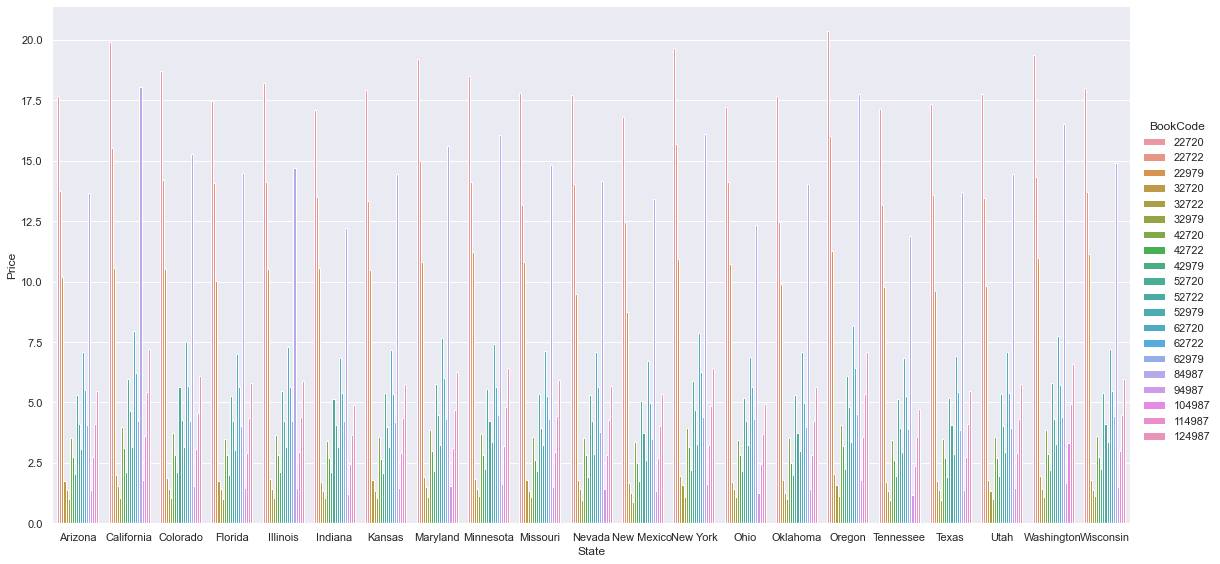

In [53]:
plt.figure(figsize=(24,18))
sns.catplot(x= 'State',y= 'Price', hue='BookCode', data=sales_train,kind='bar',ci=None,aspect=2, height = 8)


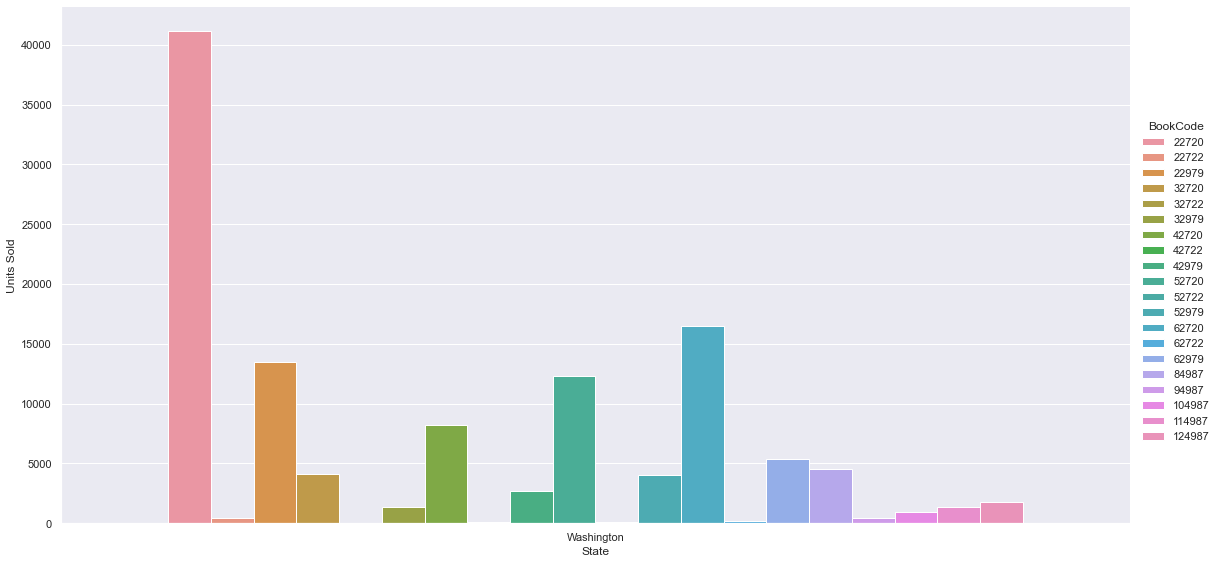

In [169]:
sns.catplot(x= 'State',y= 'Units Sold', hue='BookCode', data=sales_2019[sales_2019['State']=='Washington'],kind='bar',ci=None,aspect=2, height = 8)


<Figure size 1728x1296 with 0 Axes>

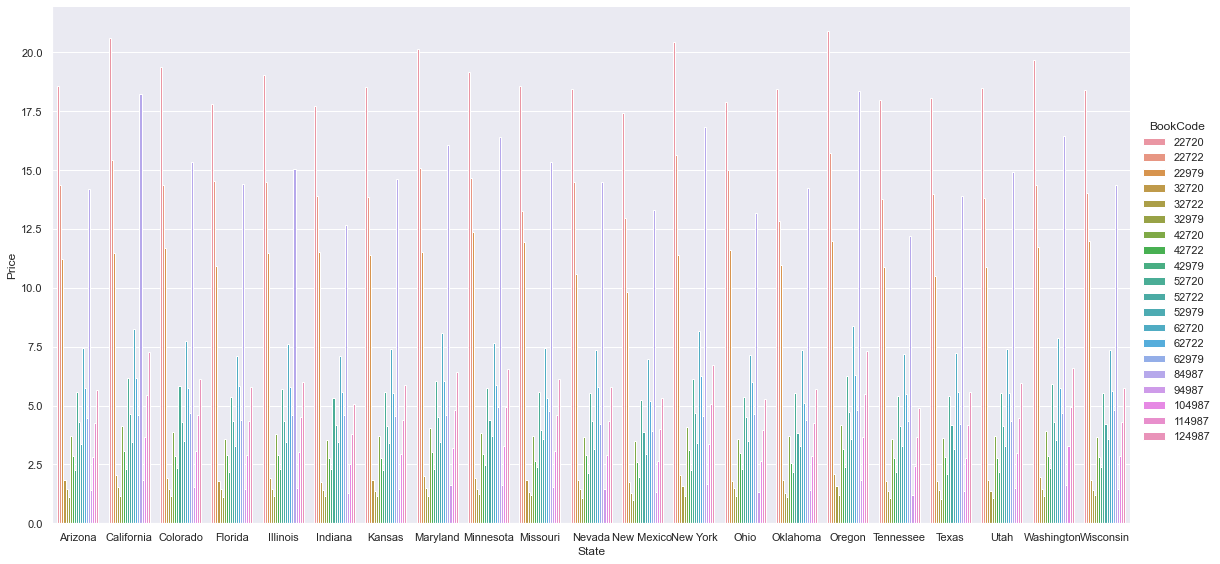

In [54]:
plt.figure(figsize=(24,18))
sns.catplot(x= 'State',y= 'Price', hue='BookCode', data=sales_test,kind='bar',ci=None, aspect=2, height = 8)


In [31]:
sales_2017 = sales_train[sales_train['Year']=='2017']
sales_2018 = sales_train[sales_train['Year']=='2018']
sales_2019 = sales_train[sales_train['Year']=='2019']


In [55]:
sales_test['Year'].unique()

array(['2019'], dtype=object)

<Figure size 1728x1296 with 0 Axes>

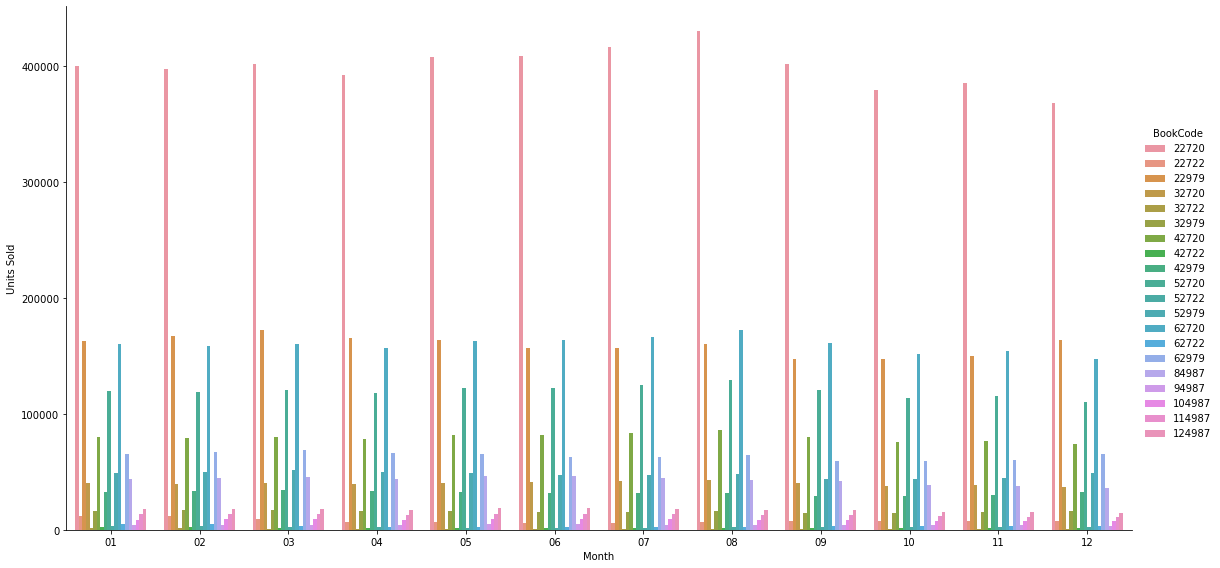

In [37]:
plt.figure(figsize=(24,18))
sns.catplot(x= 'Month',y= 'Units Sold', hue='BookCode', data=sales_2018,kind='bar',ci = None,aspect=2, height = 8)


<Figure size 1728x1296 with 0 Axes>

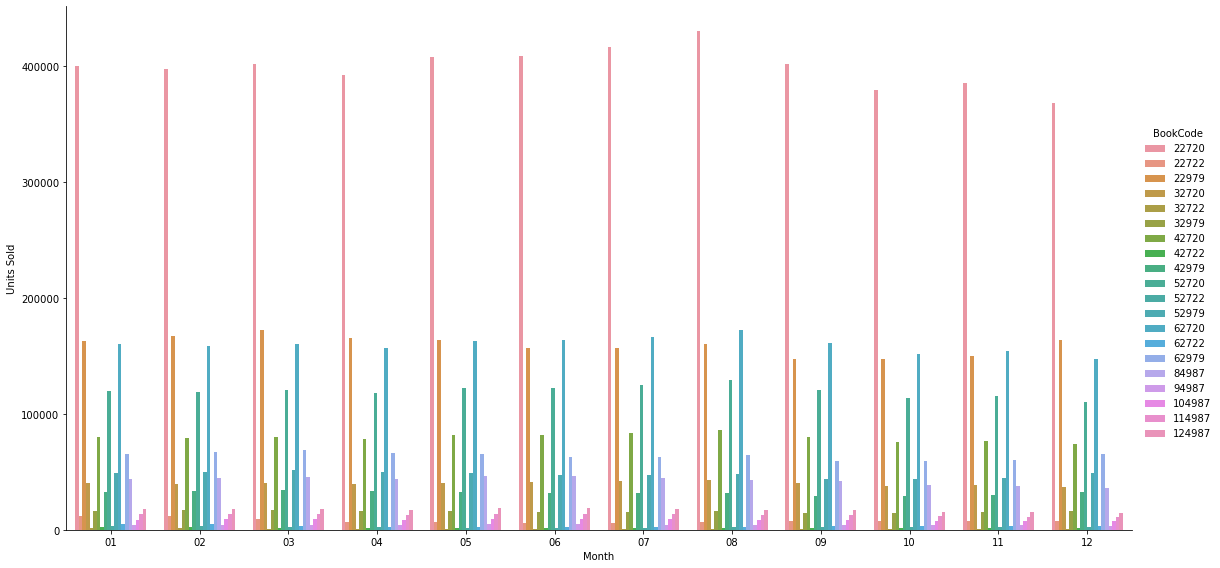

In [38]:
plt.figure(figsize=(24,18))
sns.catplot(x= 'Month',y= 'Units Sold', hue='BookCode', data=sales_2018,kind='bar',ci=None,aspect=2, height = 8)


<Figure size 1728x1296 with 0 Axes>

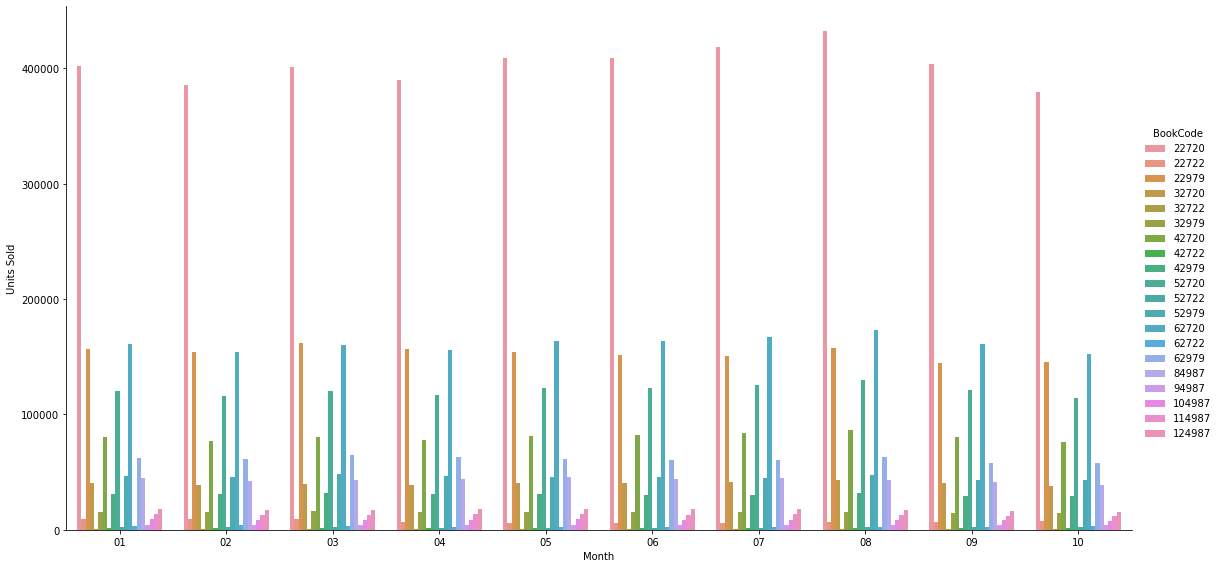

In [39]:
plt.figure(figsize=(24,18))
sns.catplot(x= 'Month',y= 'Units Sold', hue='BookCode', data=sales_2019,kind='bar',ci=None,aspect=2, height = 8)

<Figure size 1728x1296 with 0 Axes>

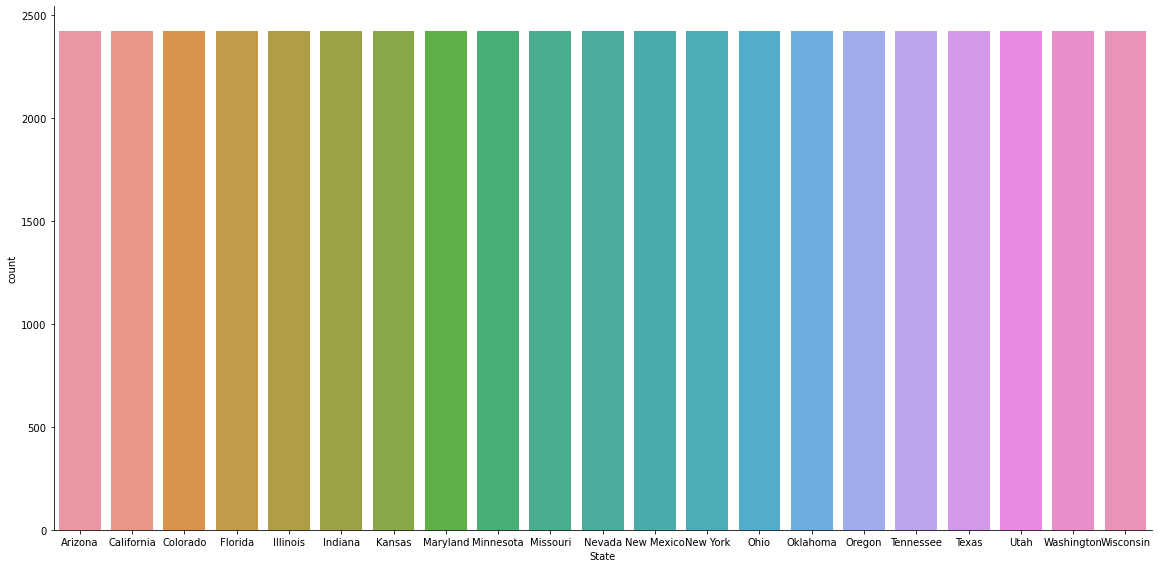

In [41]:
plt.figure(figsize=(24,18))
sns.catplot(x= 'State',
            data=sales_train,kind='count',aspect=2, height = 8)

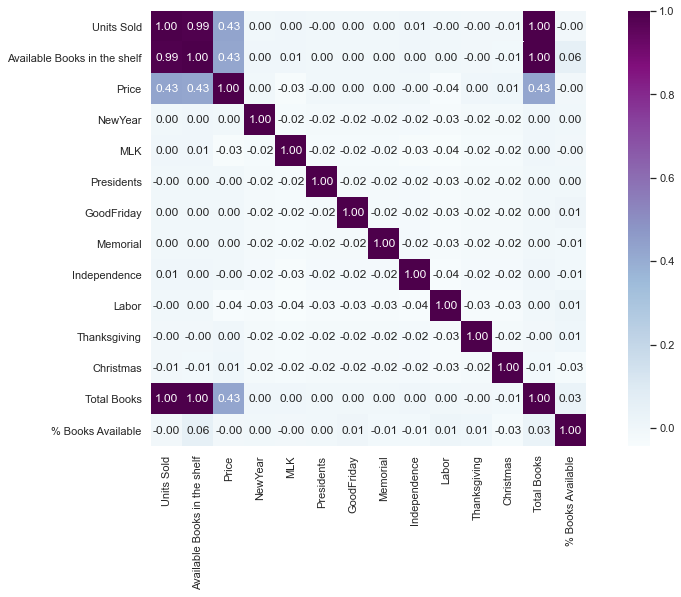

In [43]:
sales_corr = sales_train.drop(['BookCode'],axis=1)

matrix=sales_corr.corr()
f,ax=plt.subplots(figsize=(15,8))
sns.set(font_scale=1.0)
sns.heatmap(matrix,vmax=1, annot=True, square=True, fmt='.2f',cmap="BuPu")

In [58]:
sales_train['log(Units Sold)'] = np.log(sales_train['Units Sold'])
sales_train['log(Available Books)'] = np.log(sales_train['Available Books in the shelf'])
sales_test['log(Available Books)'] = np.log(sales_test['Available Books in the shelf'])


In [203]:
sales_train.head(2)

,Units Sold,Available Books in the shelf,Price,State,Time,Week,NewYear,MLK,Presidents,GoodFriday,Memorial,Independence,Labor,Thanksgiving,Christmas,BookCode
0,6187.0,10146.68,14.474543,Arizona,Week End 01-06-19,2019-01-06,1,0,0,0,0,0,0,0,0,22722
1,9123.0,15144.18,14.174504,Arizona,Week End 01-07-18,2018-01-07,1,0,0,0,0,0,0,0,0,22722


In [204]:
sales_test.head(2)

,Available Books in the shelf,Price,State,Time,Week,NewYear,MLK,Presidents,GoodFriday,Memorial,Independence,Labor,Thanksgiving,Christmas,BookCode
0,5123.0,14.106784,Arizona,Week End 11-03-19,2019-11-03,0,0,0,0,0,0,0,0,0,22722
1,10064.0,13.935992,Arizona,Week End 11-10-19,2019-11-10,0,0,0,0,0,0,0,0,0,22722


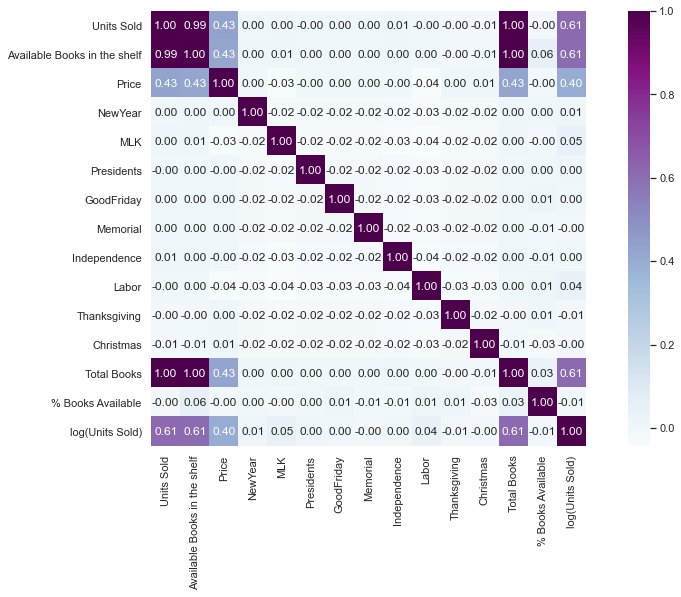

In [46]:
sales_corr = sales_train.drop(['BookCode'],axis=1)

matrix=sales_corr.corr()
f,ax=plt.subplots(figsize=(15,8))
sns.set(font_scale=1.0)
sns.heatmap(matrix,vmax=1, annot=True, square=True, fmt='.2f',cmap="BuPu")

Treating Categorical Variables

In [61]:
print('Train Shape',sales_train.shape)
print('Test Shape',sales_test.shape)

Train Shape (50820, 23)
Test Shape (3780, 19)


In [127]:
y= sales_train[['Units Sold']]

In [77]:
sales_train = sales_train.drop(['Time'],axis=1)
sales_test = sales_test.drop(['Time'],axis=1)

In [93]:
train = sales_train.drop(['Year', 'Month', 'Day'],axis=1)
test = sales_test.drop(['Year', 'Month', 'Day'],axis=1)

In [130]:
sales_train_categorical = train.select_dtypes(include = 'object')
sales_test_categorical = test.select_dtypes(include = 'object')
print("Train Columns: ", sales_train_categorical.columns)
print("Test Columns: ", sales_test_categorical.columns)

Train Columns:  Index(['State'], dtype='object')
Test Columns:  Index(['State'], dtype='object')


In [131]:
train_obj_cols = sales_train_categorical.columns
test_obj_cols = sales_test_categorical.columns
train_df = train.drop(train_obj_cols,axis = 1)
test_df = test.drop(train_obj_cols,axis = 1)

In [132]:
print('Train Shape',train_df.shape)
print('Test Shape',test_df.shape)

Train Shape (50820, 18)
Test Shape (3780, 14)


In [135]:
test_df.columns

Index(['Available Books in the shelf', 'Price', 'Week', 'NewYear', 'MLK',
       'Presidents', 'GoodFriday', 'Memorial', 'Independence', 'Labor',
       'Thanksgiving', 'Christmas', 'BookCode', 'log(Available Books)'],
      dtype='object')

In [136]:
test_df = test_df.drop(['log(Available Books)'],axis=1)

In [134]:
train_df = train_df.drop(['Total Books','% Books Available','log(Units Sold)','log(Available Books)'],axis=1)

In [137]:
# also the unique number of categorical values aren't same, which results in different test and train shape
train_len = train_df.shape[0]

# Combining the two categorical datsets one after the other
combined = pd.concat([sales_train_categorical,sales_test_categorical],ignore_index=True, sort = False)
categorical_cols = combined.columns


# Creating Label Encoded values for the categorical values avoid the dummy variable trap
dummies = pd.get_dummies(combined, columns=categorical_cols,  drop_first = True)

# Seperating the datasets from combined dataset
train_dummies = dummies[:train_len]
test_dummies = dummies[train_len:]

In [138]:
print('Train Shape',train_df.shape)
print('Test Shape',test_df.shape)

Train Shape (50820, 14)
Test Shape (3780, 13)


In [155]:
train_df.to_csv('C:/Users/DuttaAnn/Downloads/scalathon/Advanced_Scalathon_dataset/Advanced_Scalathon_dataset/scalathon2021/scalathon2021/train_df.csv',index=False)

test_df.to_csv('C:/Users/DuttaAnn/Downloads/scalathon/Advanced_Scalathon_dataset/Advanced_Scalathon_dataset/scalathon2021/scalathon2021/test_df.csv',index=False)


In [140]:
print('Train Shape',train_dummies.shape)
print('Test Shape',test_dummies.shape)

Train Shape (50820, 20)
Test Shape (3780, 20)


In [113]:
train_dummies.head(2)

,State_California,State_Colorado,State_Florida,State_Illinois,State_Indiana,State_Kansas,State_Maryland,State_Minnesota,State_Missouri,State_Nevada,State_New Mexico,State_New York,State_Ohio,State_Oklahoma,State_Oregon,State_Tennessee,State_Texas,State_Utah,State_Washington,State_Wisconsin
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [141]:
# Concatenating with the main DataFrame
train_df.reset_index(drop=True, inplace=True)
train_dummies.reset_index(drop=True, inplace=True)
df_train = pd.concat([train_df,train_dummies],axis = 1)
print(df_train.shape)

(50820, 34)


In [142]:
test_df.reset_index(drop=True, inplace=True)
test_dummies.reset_index(drop=True, inplace=True)
df_test = pd.concat([test_df,test_dummies],axis = 1)

In [143]:
print('Train Shape',df_train.shape)
print('Test Shape',df_test.shape)

Train Shape (50820, 34)
Test Shape (3780, 33)


In [144]:
import datetime as dt
df_train['Week'] = pd.to_datetime(df_train['Week'])
df_train['Week']=df_train['Week'].map(dt.datetime.toordinal)

In [145]:
df_test['Week'] = pd.to_datetime(df_test['Week'])
df_test['Week']=df_test['Week'].map(dt.datetime.toordinal)

In [152]:
df_train = df_train.drop(['Units Sold'],axis=1)

In [153]:

#Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler_x = StandardScaler().fit(df_train)
train_X = scaler_x.transform(df_train)
test_X = scaler_x.transform(df_test)

In [162]:
pd.DataFrame(train_X,columns=df_train.columns).to_csv('C:/Users/DuttaAnn/Downloads/scalathon/Advanced_Scalathon_dataset/Advanced_Scalathon_dataset/scalathon2021/scalathon2021/scaled_train.csv',index=False)
pd.DataFrame(test_X,columns=df_test.columns).to_csv('C:/Users/DuttaAnn/Downloads/scalathon/Advanced_Scalathon_dataset/Advanced_Scalathon_dataset/scalathon2021/scalathon2021/scaled_test.csv',index=False)

In [124]:
y.shape

(50820, 1)

In [149]:
print('Train Shape',train_X.shape)
print('Test Shape',test_X.shape)

Train Shape (50820, 34)
Test Shape (3780, 33)


In [150]:
y.isnull().sum()

Units Sold    0
dtype: int64

In [156]:
y.to_csv('C:/Users/DuttaAnn/Downloads/scalathon/Advanced_Scalathon_dataset/Advanced_Scalathon_dataset/scalathon2021/scalathon2021/target.csv',index=False)

## Forecasting

In [47]:
import numpy as np
import pandas as pd
import math

import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
%matplotlib inline

import itertools
import warnings
warnings.filterwarnings('ignore')

In [4]:
# sales_train.set_index('Week',inplace=True)
sales_train = sales_train.drop(['Time'],axis=1)

In [5]:
sales_train.head(2)

,Units Sold,Available Books in the shelf,Price,State,Week,NewYear,MLK,Presidents,GoodFriday,Memorial,Independence,Labor,Thanksgiving,Christmas,BookCode
0,6187.0,10146.68,14.474543,Arizona,2019-01-06,1,0,0,0,0,0,0,0,0,22722
1,9123.0,15144.18,14.174504,Arizona,2018-01-07,1,0,0,0,0,0,0,0,0,22722


In [6]:
# sales_test.set_index('Week',inplace=True)
sales_test = sales_test.drop(['Time'],axis=1)

In [7]:
sales_test.head(2)

,Available Books in the shelf,Price,State,Week,NewYear,MLK,Presidents,GoodFriday,Memorial,Independence,Labor,Thanksgiving,Christmas,BookCode
0,5123.0,14.106784,Arizona,2019-11-03,0,0,0,0,0,0,0,0,0,22722
1,10064.0,13.935992,Arizona,2019-11-10,0,0,0,0,0,0,0,0,0,22722


In [287]:
sales_train_categorical = sales_train.select_dtypes(include = 'object')
sales_test_categorical = sales_test.select_dtypes(include = 'object')

In [288]:
sales_train_categorical.columns

Index(['State'], dtype='object')

In [289]:
combined = pd.concat([sales_train_cat,sales_test_cat],ignore_index=True, sort = False)
categorical_cols = combined.columns

# Creating Label Encoded values for the categorical values avoid the dummy variable trap
dummies = pd.get_dummies(combined, columns=categorical_cols,  drop_first = True)


In [290]:
# also the unique number of categorical values aren't same, which results in different test and train shape
train_len = sales_train.shape[0]

# Seperating the datasets from combined dataset
train_dummies = dummies[:train_len]
test_dummies = dummies[train_len:]

In [291]:
# Concatenating with the main DataFrame
sales_train.reset_index(drop=True, inplace=True)
train_dummies.reset_index(drop=True, inplace=True)
df_train = pd.concat([sales_train,train_dummies],axis = 1)
print(df_train.shape)

(50820, 35)


In [292]:
# Concatenating with the main DataFrame
sales_test.reset_index(drop=True, inplace=True)
test_dummies.reset_index(drop=True, inplace=True)
df_test = pd.concat([sales_test,test_dummies],axis = 1)
print(df_test.shape)

(3780, 34)


In [293]:
df_train['Week'] = pd.to_datetime(df_train['Week'])
df_test['Week'] = pd.to_datetime(df_test['Week'])

In [298]:
train = df_train.copy()
train = train.set_index('Week')

In [299]:
test = df_test.copy()
test = test.set_index('Week')

In [305]:
train = train.drop(['State'],axis=1)
test = test.drop(['State'],axis=1)

In [307]:
train_df = train.reset_index()

In [309]:
train_df = train_df.drop(['Week'],axis=1)

In [312]:
train.head()

,Units Sold,Available Books in the shelf,Price,NewYear,MLK,Presidents,GoodFriday,Memorial,Independence,Labor,...,State_New Mexico,State_New York,State_Ohio,State_Oklahoma,State_Oregon,State_Tennessee,State_Texas,State_Utah,State_Washington,State_Wisconsin
Week,,,,,,,,,,,,,,,,,,,,,
2019-01-06,6187.0,10146.68,14.474543,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-01-07,9123.0,15144.18,14.174504,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-01-13,6236.0,8356.24,14.150096,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-01-14,8080.0,11312.00,14.078218,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-01-20,5695.0,7289.60,14.238279,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [311]:
##to decipher underlying patterns we must decompose the series.
decomposition = sm.tsa.seasonal_decompose(train, model='additive',period=7)

TypeError: Index(...) must be called with a collection of some kind, 'seasonal' was passed

In [315]:
def test_stationary(timeseries, window=12):
    
    # Rolling statistics
    movingAverage = timeseries.rolling(window=window).mean()
    movingSTD = timeseries.rolling(window=window).std()
    
    # Plot rolling statistics
    plt.figure(figsize=(20,5))
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(movingAverage, color='red', label='Rolling Mean')
    plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation\n')
    plt.show(block=False)
    
    # Dickey Fuller test
    print('Results of Dickey Fuller Test:\n')
    dftest = adfuller(timeseries['Units Sold'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 'No. of Lags used', 'Number of observations used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    print(dfoutput)


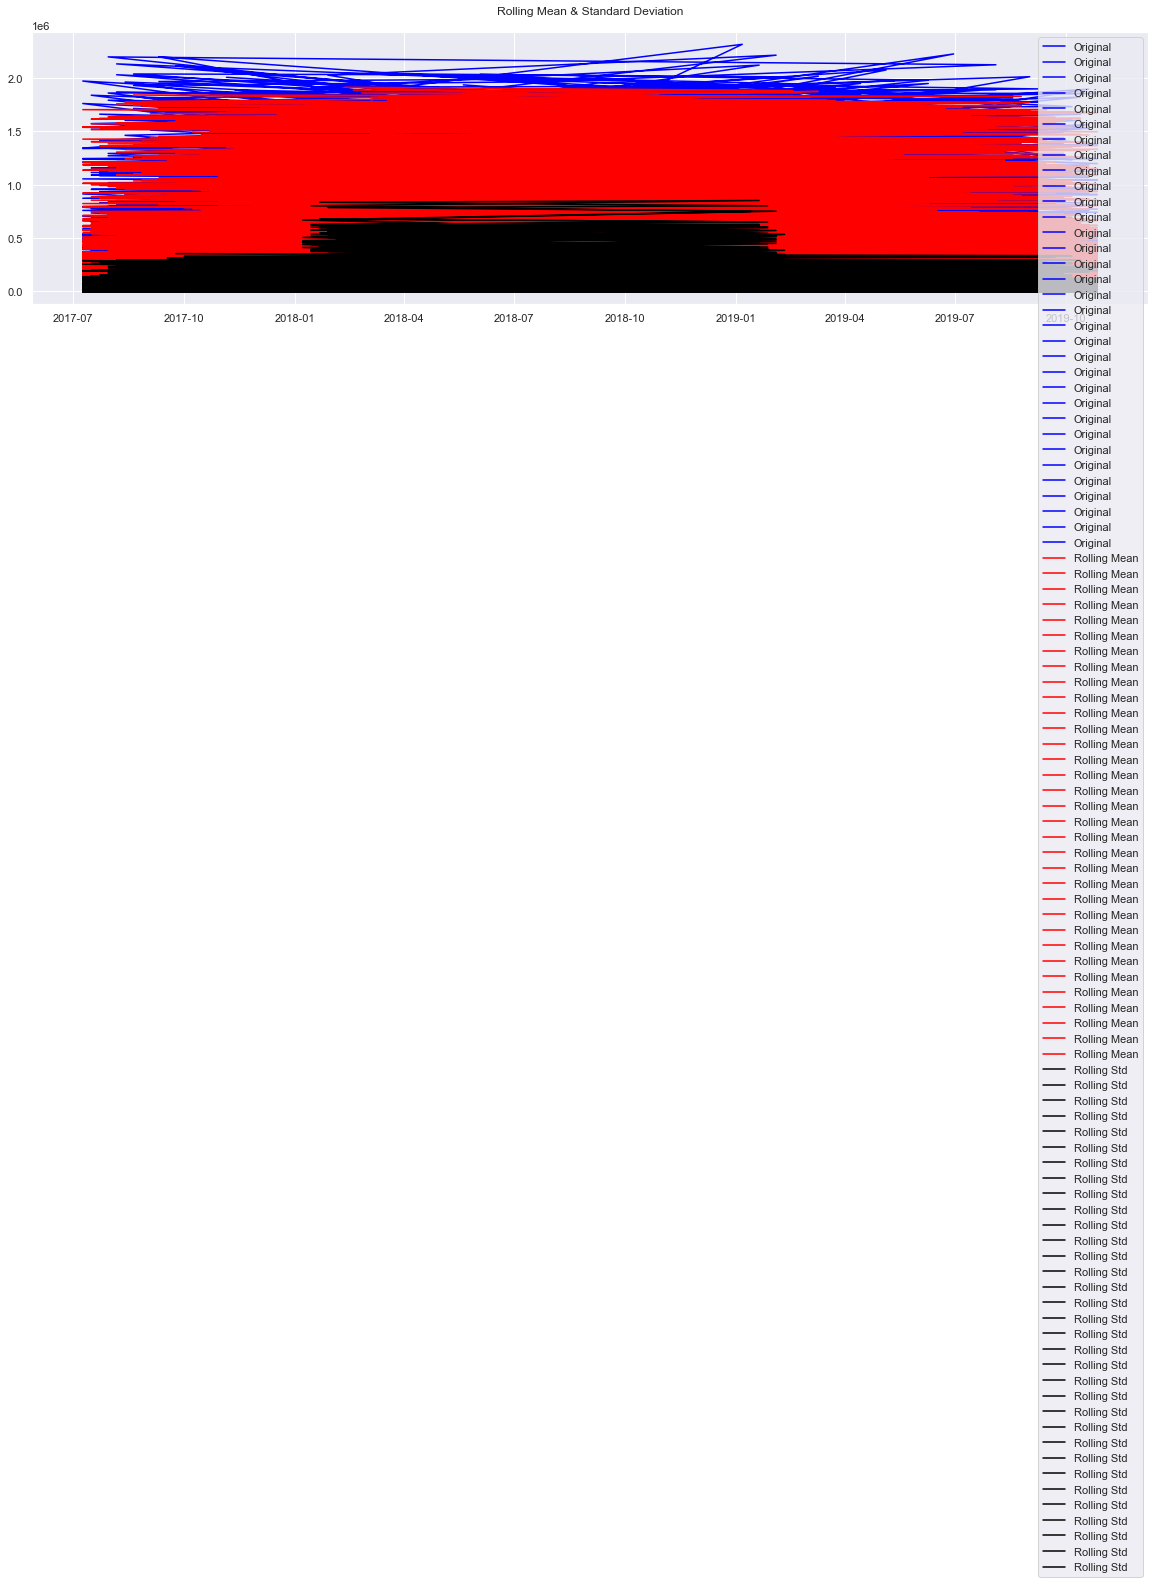

Results of Dickey Fuller Test:

Test Statistic                -1.206337e+01
p-value                        2.440155e-22
No. of Lags used               5.700000e+01
Number of observations used    5.076200e+04
Critical Value (1%)           -3.430479e+00
Critical Value (5%)           -2.861597e+00
Critical Value (10%)          -2.566800e+00
dtype: float64


In [316]:
test_stationary(train, window=12)

ValueError: x is required to have ndim 1 but has ndim 2

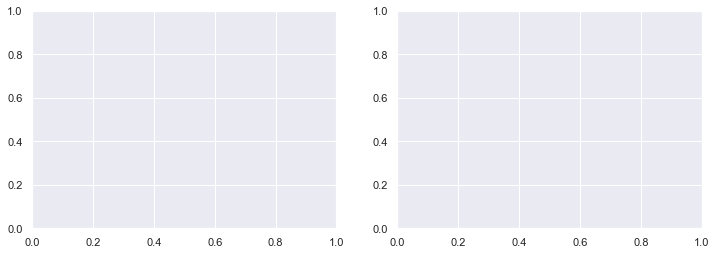

In [320]:
fig, axes = plt.subplots(1, 2, sharey=False, sharex=False)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(train, lags=30, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(train, lags=30, ax=axes[1], alpha=0.5)
plt.tight_layout()

In [323]:
train.head(2)

,Units Sold,Available Books in the shelf,Price,NewYear,MLK,Presidents,GoodFriday,Memorial,Independence,Labor,...,State_New Mexico,State_New York,State_Ohio,State_Oklahoma,State_Oregon,State_Tennessee,State_Texas,State_Utah,State_Washington,State_Wisconsin
Week,,,,,,,,,,,,,,,,,,,,,
2019-01-06,6187.0,10146.68,14.474543,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-01-07,9123.0,15144.18,14.174504,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [325]:
sales_train['State'].nunique()

21

In [27]:
sales_arizona = sales_train[sales_train['State']=='Arizona']

In [28]:
sales_test_arizona = sales_test[sales_test['State']=='Arizona']

In [29]:
sales_arizona.head()

,Units Sold,Available Books in the shelf,Price,State,Week,NewYear,MLK,Presidents,GoodFriday,Memorial,Independence,Labor,Thanksgiving,Christmas,BookCode
0,6187.0,10146.68,14.474543,Arizona,2019-01-06,1,0,0,0,0,0,0,0,0,22722
1,9123.0,15144.18,14.174504,Arizona,2018-01-07,1,0,0,0,0,0,0,0,0,22722
2,6236.0,8356.24,14.150096,Arizona,2019-01-13,0,0,0,0,0,0,0,0,0,22722
3,8080.0,11312.00,14.078218,Arizona,2018-01-14,0,0,0,0,0,0,0,0,0,22722
4,5695.0,7289.60,14.238279,Arizona,2019-01-20,0,0,0,0,0,0,0,0,0,22722


In [30]:
arizona = sales_arizona[['Units Sold','Available Books in the shelf','Price','Week','BookCode']]

In [31]:
arizona = arizona.sort_values(by=['Week'])

In [43]:
arizona.head()

,Units Sold,Available Books in the shelf,Price,Week,BookCode
30546,1156.8,1654.224,4.006743,2017-07-09,52722
54,3856.0,5514.080,13.355809,2017-07-09,22722
43251,45333.6,77067.120,3.983638,2017-07-09,62979
40710,1542.4,2205.632,5.342324,2017-07-09,62722
38169,100328.4,154505.736,5.126034,2017-07-09,52720


In [33]:
arizona_plt = arizona[['Units Sold','Week']]
arizona_plt.head()

,Units Sold,Week
30546,1156.8,2017-07-09
54,3856.0,2017-07-09
43251,45333.6,2017-07-09
40710,1542.4,2017-07-09
38169,100328.4,2017-07-09


In [45]:
arizona_book = arizona[arizona['BookCode']==22722]
arizona_book.head()

,Units Sold,Available Books in the shelf,Price,Week,BookCode
54,3856.0,5514.08,13.355809,2017-07-09,22722
57,3795.0,5958.15,13.316206,2017-07-16,22722
60,3740.0,5161.20,13.522460,2017-07-23,22722
63,3834.0,5099.22,13.584768,2017-07-30,22722
66,4522.0,5923.82,13.561920,2017-08-06,22722


Text(0, 0.5, 'Units Sold')

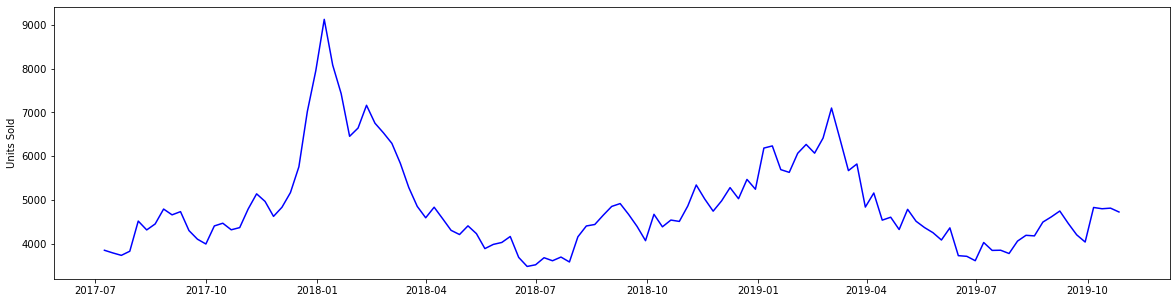

In [46]:
plt.figure(figsize=(20,5))
plt.plot(arizona_book['Week'],arizona_book['Units Sold'], color='blue')
plt.ylabel('Units Sold')

In [49]:
arizona_book = arizona_book.set_index('Week')

In [52]:
decomposition = sm.tsa.seasonal_decompose(pd.DataFrame(arizona_book,columns=['seasonal']), model='additive',freq=30)

ValueError: This function does not handle missing values

In [54]:
def test_stationary(timeseries, window=12):
    
    # Rolling statistics
    movingAverage = timeseries.rolling(window=window).mean()
    movingSTD = timeseries.rolling(window=window).std()
    
    # Plot rolling statistics
    plt.figure(figsize=(20,5))
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(movingAverage, color='red', label='Rolling Mean')
    plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation\n')
    plt.show(block=False)
    
    # Dickey Fuller test
    print('Results of Dickey Fuller Test:\n')
    dftest = adfuller(timeseries['Units Sold'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 'No. of Lags used', 'Number of observations used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    print(dfoutput)

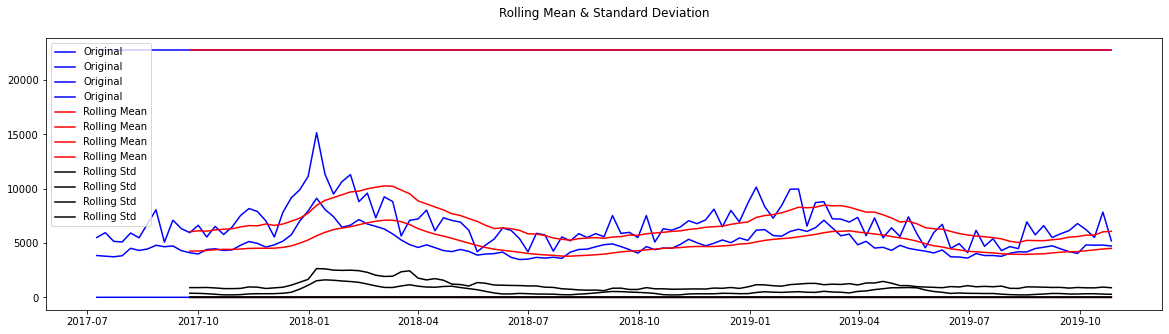

Results of Dickey Fuller Test:

Test Statistic                  -3.433703
p-value                          0.009862
No. of Lags used                13.000000
Number of observations used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64


In [55]:
test_stationary(arizona_book, window=12)

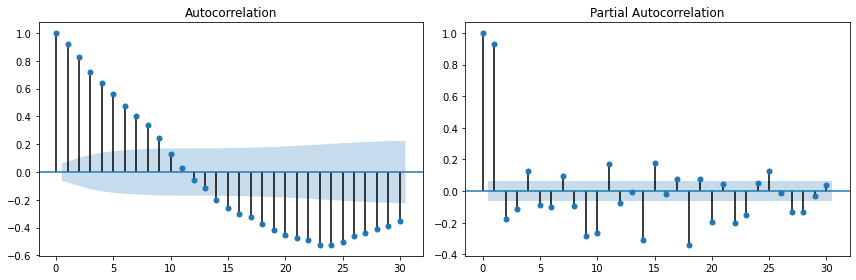

In [57]:
fig, axes = plt.subplots(1, 2, sharey=False, sharex=False)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(arizona_book['Units Sold'], lags=30, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(arizona_book['Units Sold'], lags=30, ax=axes[1], alpha=0.5)
plt.tight_layout()

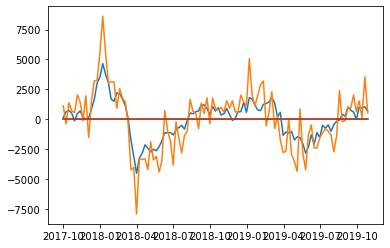

In [58]:
diff_12 = arizona_book.diff(periods=12)
diff_12.dropna(inplace=True)

plt.plot(diff_12)

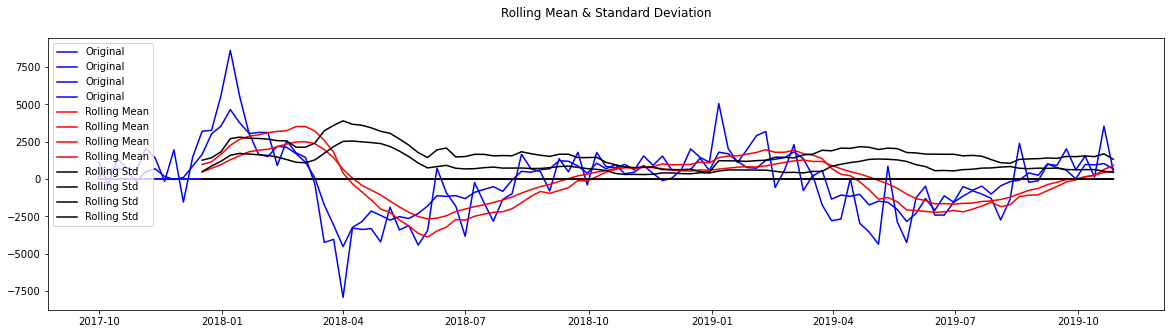

Results of Dickey Fuller Test:

Test Statistic                 -3.944846
p-value                         0.001729
No. of Lags used               13.000000
Number of observations used    95.000000
Critical Value (1%)            -3.501137
Critical Value (5%)            -2.892480
Critical Value (10%)           -2.583275
dtype: float64


In [59]:
test_stationary(diff_12)

In [65]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [66]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [67]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [72]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:        
#         try:
        temp_model = sm.tsa.statespace.SARIMAX(arizona_book['Units Sold'],
                                         order = param,
                                         seasonal_order = param_seasonal,
                                         enforce_stationarity=True,
                                         enforce_invertibility=True)
        results = temp_model.fit()
        if results.aic < best_aic:
#             print(results.aic)
            best_aic = results.aic
            best_pdq = param
            best_seasonal_pdq = param_seasonal
#         except:
#             continue

print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

2405.484237411288
2300.5962527976767
1915.956080290493
1914.5459426443124
1903.848681261273
1829.7012707717774
1819.3842726291725
1809.7573124351086
1781.2332511858663
1778.1949188617946
1703.3138412134772
1635.7639533570978
1633.9855299847738
1632.813278256188
Best SARIMAX(0, 1, 1)x(1, 1, 1, 12)12 model - AIC:1632.813278256188


In [73]:
best_pdq = (0, 1, 1)
best_seasonal_pdq = (1, 1, 1, 12)

In [74]:
best_model = sm.tsa.statespace.SARIMAX(arizona_book['Units Sold'],
                                      order=best_pdq,
                                      seasonal_order=best_seasonal_pdq,
                                      enforce_stationarity=True,
                                      enforce_invertibility=True)
best_results = best_model.fit()

In [75]:
print(best_results.summary().tables[0])

                                     SARIMAX Results                                      
Dep. Variable:                         Units Sold   No. Observations:                  121
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -812.407
Date:                            Wed, 17 Mar 2021   AIC                           1632.813
Time:                                    22:28:57   BIC                           1643.542
Sample:                                07-09-2017   HQIC                          1637.163
                                     - 10-27-2019                                         
Covariance Type:                              opg                                         


In [76]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('2019-11-03'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

In [77]:
arizona_book_pred = pred_dynamic.predicted_mean
# arizona_book_truth = arizona_book['1990':].Precipitation

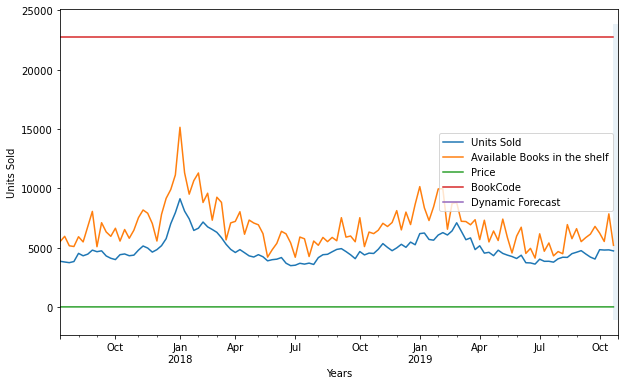

In [80]:
axis_plt = arizona_book['2017-07-09':].plot(label='Observed', figsize=(10, 6))

# Plot the predicted values.
pred_dynamic.predicted_mean.plot(ax=axis_plt, label='Dynamic Forecast')

# Plot confidence values and fill it with some colour.
axis_plt.fill_between(pred_dynamic_ci.index, pred_dynamic_ci.iloc[:, 0], pred_dynamic_ci.iloc[:, 1], color='k', alpha=0.1)
axis_plt.fill_betweenx(axis_plt.get_ylim(), pd.to_datetime('2019-11-03'), arizona_book.index[-1], alpha=0.1, zorder=-1)

# Set labels.
axis_plt.set_xlabel('Years')
axis_plt.set_ylabel('Units Sold')

# Put legend on the plot at the best place it fits.
plt.legend(loc='best')

In [81]:
# Get forecast 96 steps (8 years) ahead in future
n_steps = 8
pred_uc_8 = best_results.get_forecast(steps=n_steps, alpha=0.05) # alpha=0.05 95% CI

# Get confidence intervals 95% of the forecasts
pred_ci_8 = pred_uc_8.conf_int()

In [114]:
# index = pd.date_range(arizona_test_book.index, periods=n_steps)
forecast_data = pd.DataFrame(np.column_stack([pred_uc_8.predicted_mean, pred_ci_8]), 
                     index=arizona_test_book.index[:-1], columns=['forecast', 'lower_ci_8', 'upper_ci_8'])

forecast_data.head()


,forecast,lower_ci_8,upper_ci_8
Week_t,,,
2019-11-03,4800.802417,4003.599181,5598.005653
2019-11-10,4974.217992,3745.335115,6203.100870
2019-11-17,4645.761568,3101.503866,6190.019271
2019-11-24,4571.644734,2766.288372,6377.001096
2019-12-01,4406.016821,2372.819509,6439.214134


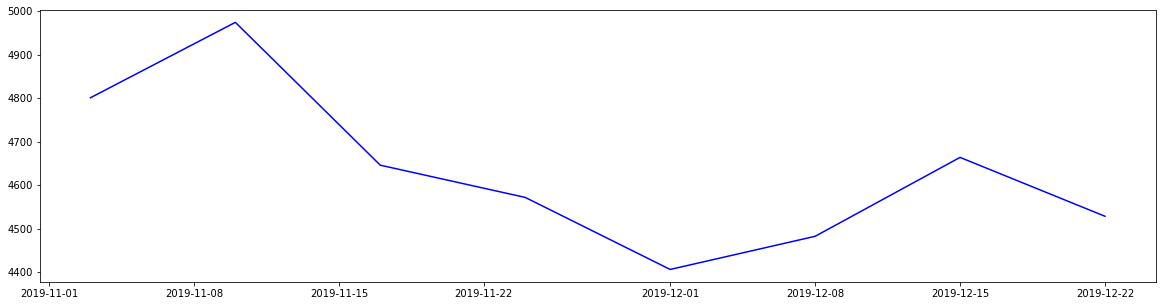

In [116]:
plt.figure(figsize=(20,5))
plt.plot(forecast_data.index,forecast_data['forecast'], color='blue')
# plt.ylabel('Units Sold')

In [113]:
arizona_test_book.index[:-1]

DatetimeIndex(['2019-11-03', '2019-11-10', '2019-11-17', '2019-11-24',
               '2019-12-01', '2019-12-08', '2019-12-15', '2019-12-22'],
              dtype='datetime64[ns]', name='Week_t', freq=None)

In [103]:
# arizona_test = sales_test_arizona[['Available Books in the shelf','Price','Week','BookCode']]
# arizona_test_book = arizona_test[arizona_test['BookCode']==22722]
# arizona_test_book['Week_time'] = arizona_test_book['Week'].values.astype(np.int64) // 10 ** 9
arizona_test_book = arizona_test_book.set_index('Week_t')
arizona_test_book.head()

,Available Books in the shelf,Price,Week,BookCode
Week_t,,,,
2019-11-03,5123.0,14.106784,2019-11-03,22722
2019-11-10,10064.0,13.935992,2019-11-10,22722
2019-11-17,8299.0,13.792752,2019-11-17,22722
2019-11-24,6970.0,13.946064,2019-11-24,22722
2019-12-01,9207.0,14.167042,2019-12-01,22722


In [101]:
import datetime as dt
arizona_test_book['Week_t'] = arizona_test_book['Week'].apply(lambda x: pd.Timestamp(x))

In [107]:
arizona_test_book.head()

,Available Books in the shelf,Price,Week,BookCode
Week_t,,,,
2019-11-03,5123.0,14.106784,2019-11-03,22722
2019-11-10,10064.0,13.935992,2019-11-10,22722
2019-11-17,8299.0,13.792752,2019-11-17,22722
2019-11-24,6970.0,13.946064,2019-11-24,22722
2019-12-01,9207.0,14.167042,2019-12-01,22722
